# Fatality Analysis Reporting System (FARS)

https://www.openml.org/d/40672  
Detailing the Factors Behind Traffic Fatalities on our Roads - FARS is a nationwide census providing NHTSA, Congress and the American public yearly data regarding fatal injuries suffered in motor vehicle traffic crashes.

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns

### Load the data from openml

In [2]:
from sklearn.datasets import fetch_openml
fars = fetch_openml(name='fars')

In [3]:
fars_pd = pd.DataFrame(fars.data, columns=fars.feature_names)
fars_pd['target'] = fars.target

##### What categories are available?

In [4]:
fars_pd.columns

Index(['CASE_STATE', 'AGE', 'SEX', 'PERSON_TYPE', 'SEATING_POSITION',
       'RESTRAINT_SYSTEM-USE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT', 'EJECTION',
       'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION',
       'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION',
       'ALCOHOL_TEST_TYPE', 'ALCOHOL_TEST_RESULT',
       'POLICE-REPORTED_DRUG_INVOLVEMENT', 'METHOD_OF_DRUG_DETERMINATION',
       'DRUG_TEST_TYPE', 'DRUG_TEST_RESULTS_(1_of_3)',
       'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)',
       'DRUG_TEST_TYPE_(3_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)',
       'HISPANIC_ORIGIN', 'TAKEN_TO_HOSPITAL',
       'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RELATED_FACTOR_(2)-PERSON_LEVEL',
       'RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE', 'target'],
      dtype='object')

In [5]:
categorie_to_color = 'target'

#### Have a quick look

In [6]:
fars_pd.sample(5)

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,target
24608,9.0,58.0,0.0,6.0,16.0,5.0,4.0,0.0,0.0,1.0,...,0.0,2.0,0.0,6.0,2.0,27.0,29.0,19.0,11.0,2
62743,32.0,86.0,0.0,7.0,8.0,7.0,11.0,0.0,0.0,1.0,...,0.0,2.0,0.0,5.0,2.0,15.0,29.0,19.0,17.0,1
85449,43.0,64.0,0.0,6.0,6.0,5.0,2.0,0.0,0.0,1.0,...,0.0,2.0,0.0,6.0,1.0,27.0,29.0,19.0,11.0,6
63398,32.0,84.0,1.0,1.0,3.0,5.0,2.0,0.0,0.0,1.0,...,0.0,2.0,0.0,6.0,0.0,27.0,29.0,19.0,11.0,4
95416,46.0,68.0,0.0,6.0,6.0,5.0,4.0,0.0,0.0,1.0,...,0.0,2.0,0.0,6.0,2.0,27.0,29.0,19.0,11.0,6


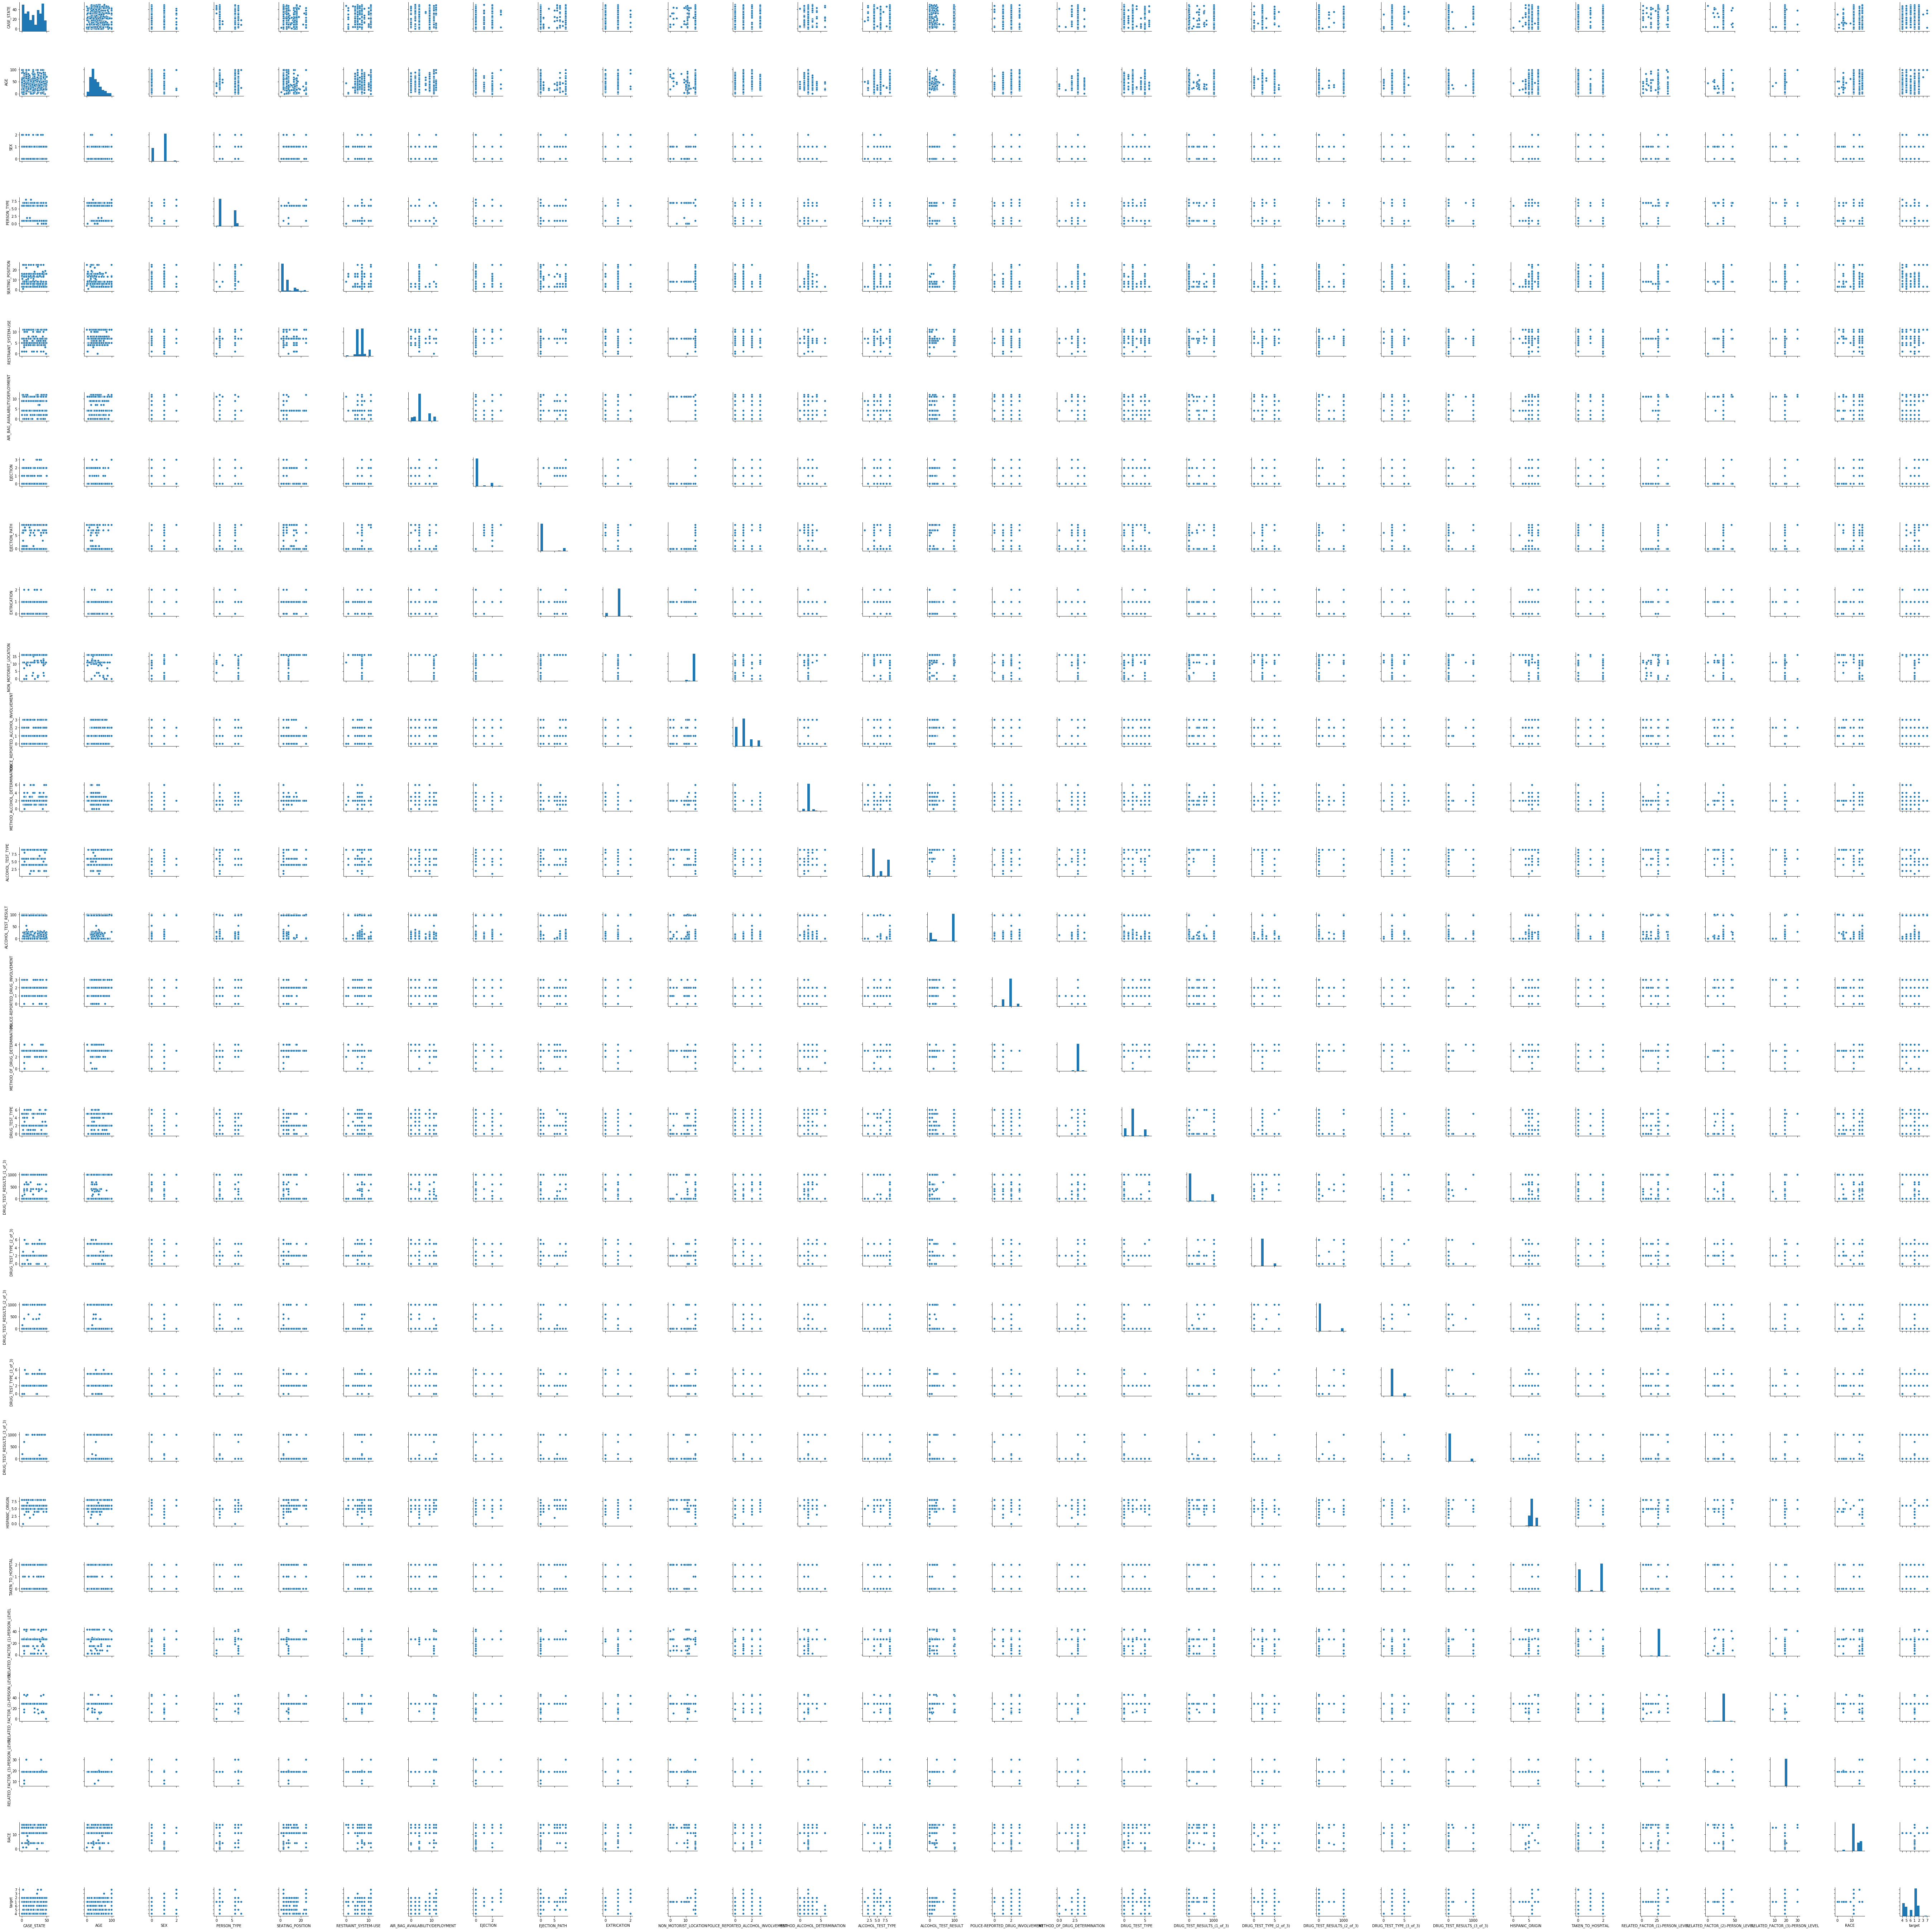

In [7]:
sns.pairplot(fars_pd.sample(1000))

### Let's try PCA (Principal Component Analysis) first

normally that works quite good for low dimensional data

### We gonna try 2d and 3d visualization

In [8]:
#3d
pca3d = PCA(n_components=3)
result3d = pca3d.fit_transform(fars_pd.drop(categorie_to_color, axis=1),fars_pd[categorie_to_color])
results3d_pd = pd.DataFrame(result3d,columns=['x','y','z'])
results3d_pd[categorie_to_color] = fars_pd[categorie_to_color].astype('int')

In [9]:
#2d
pca2d = PCA(n_components=2)
result2d = pca2d.fit_transform(fars_pd.drop(categorie_to_color, axis=1),fars_pd[categorie_to_color])
results2d_pd = pd.DataFrame(result2d,columns=['x','y'])
results2d_pd[categorie_to_color] = fars_pd[categorie_to_color].astype('int')

### Let's plot

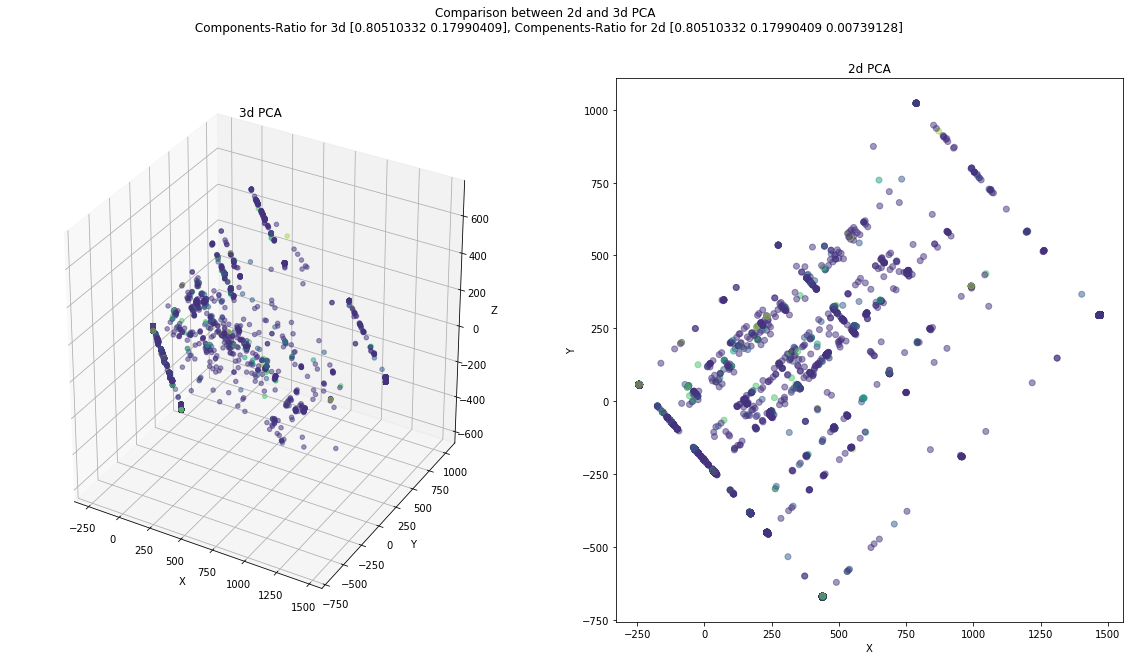

In [10]:
fig_pca = plt.figure(figsize=(20,10))
ax = fig_pca.add_subplot(121, projection='3d')
ax.scatter(results3d_pd['x'], results3d_pd['y'], results3d_pd['z'],c=results3d_pd[categorie_to_color],  alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("3d PCA")
ax.title
ax2 = fig_pca.add_subplot(122)
ax2.scatter(results2d_pd['x'], results2d_pd['y'],c=results3d_pd[categorie_to_color], alpha=0.5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title("2d PCA")

fig_pca.suptitle("Comparison between 2d and 3d PCA \n Components-Ratio for 3d {}, Compenents-Ratio for 2d {}".format(pca2d.explained_variance_ratio_,pca3d.explained_variance_ratio_))
plt.show()

#### not too impressive ... tsne should do better

In [11]:
sample_ds = fars_pd.sample(3000)
sample_ds = sample_ds.reset_index().drop("index",axis=1)
tsne = TSNE(n_components=2, verbose=1, perplexity=35, n_iter=5000,learning_rate=200 )
tsne_results = tsne.fit_transform(sample_ds)
tsne_results_pd = pd.DataFrame(tsne_results,columns=['x','y'])
tsne_results_pd[categorie_to_color] = sample_ds[categorie_to_color].astype('int')

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.012s...
[t-SNE] Computed neighbors for 3000 samples in 0.221s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 6.079796
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.106724
[t-SNE] KL divergence after 5000 iterations: 0.639076


In [12]:
sample_ds_3d = fars_pd.sample(3000)
sample_ds_3d = sample_ds_3d.reset_index().drop("index",axis=1)
tsne3d = TSNE(n_components=3, verbose=1, perplexity=45, n_iter=2500,learning_rate=200,)
tsne_results3d = tsne3d.fit_transform(sample_ds_3d)
tsne_results_pd3d = pd.DataFrame(tsne_results3d,columns=['x','y','z'])
tsne_results_pd3d[categorie_to_color] = sample_ds_3d[categorie_to_color].astype('int')

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.012s...
[t-SNE] Computed neighbors for 3000 samples in 0.238s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 6.154976
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.286453
[t-SNE] KL divergence after 2500 iterations: 0.478998


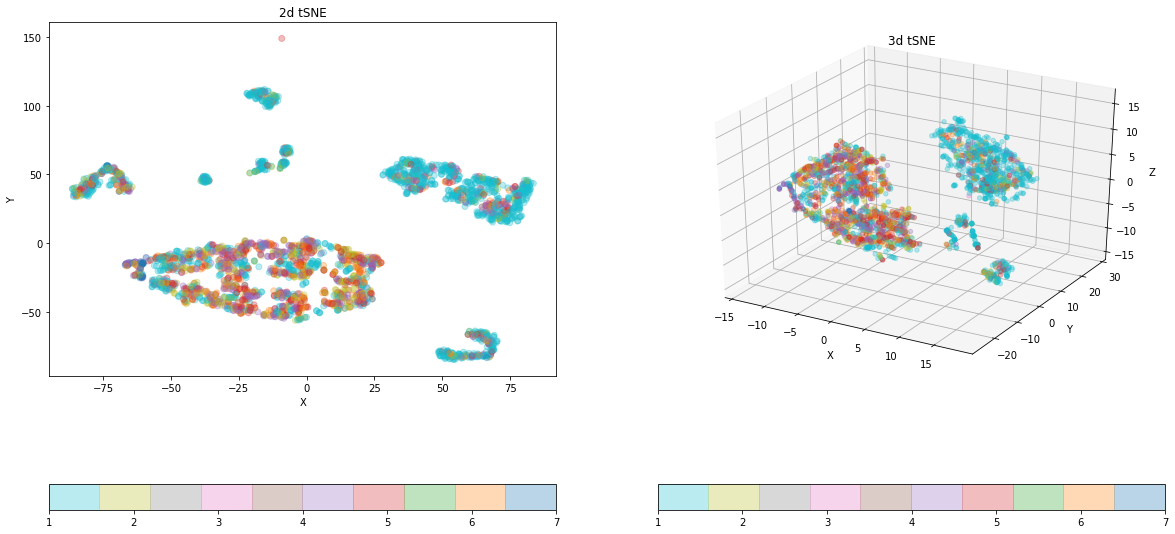

In [13]:
fig_tsne = plt.figure(figsize=(20,10))
ax3 = fig_tsne.add_subplot(121)
im = ax3.scatter(tsne_results_pd['x'], tsne_results_pd['y'],c=tsne_results_pd[categorie_to_color],alpha=0.3, cmap=plt.cm.tab10_r)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_title("2d tSNE")
fig_tsne.colorbar(im, orientation="horizontal", pad=0.2)

ax4 = fig_tsne.add_subplot(122, projection='3d')
im2 = ax4.scatter(tsne_results_pd3d['x'], tsne_results_pd3d['y'],tsne_results_pd3d['z'],c=tsne_results_pd3d[categorie_to_color],alpha=0.3, cmap=plt.cm.tab10_r)
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')
ax4.set_title("3d tSNE")


fig_tsne.colorbar(im2, orientation="horizontal", pad=0.2)

# cbaxes = fig_tsne.add_axes([0.8, 0.1, 0.03, 0.8]) 
# fig_tsne.colorbar(im2, cax=cbaxes)
plt.show()

## Accelerate with CUDA/RAPIDS and use all the data

### This part of the code needs a NVIDIA P100 or T4 and at least rapids 0.9

In [14]:
import cudf
import cuml
from cuml.manifold import TSNE as TSNE_CUDA

In [15]:
tsne_cuda = TSNE_CUDA(n_components=2, verbose=1, perplexity=35, n_iter=5000,learning_rate=200 )

In [16]:
tsne_results_c = tsne_cuda.fit_transform(cudf.DataFrame.from_pandas(fars_pd))
tsne_results_c = cudf.DataFrame.to_pandas(tsne_results_c)

Learning rate is adaptive. In TSNE paper, it has been shown that as n->inf, Barnes Hut works well if n_neighbors->30, learning_rate->20000, early_exaggeration->24.
cuML uses an adpative method.n_neighbors decreases to 30 as n->inf. Likewise for the other params.
New n_neighbors = 30, learning_rate = 33656.0, exaggeration = 24.0


In [17]:
tsne_results_c.columns=['x','y']

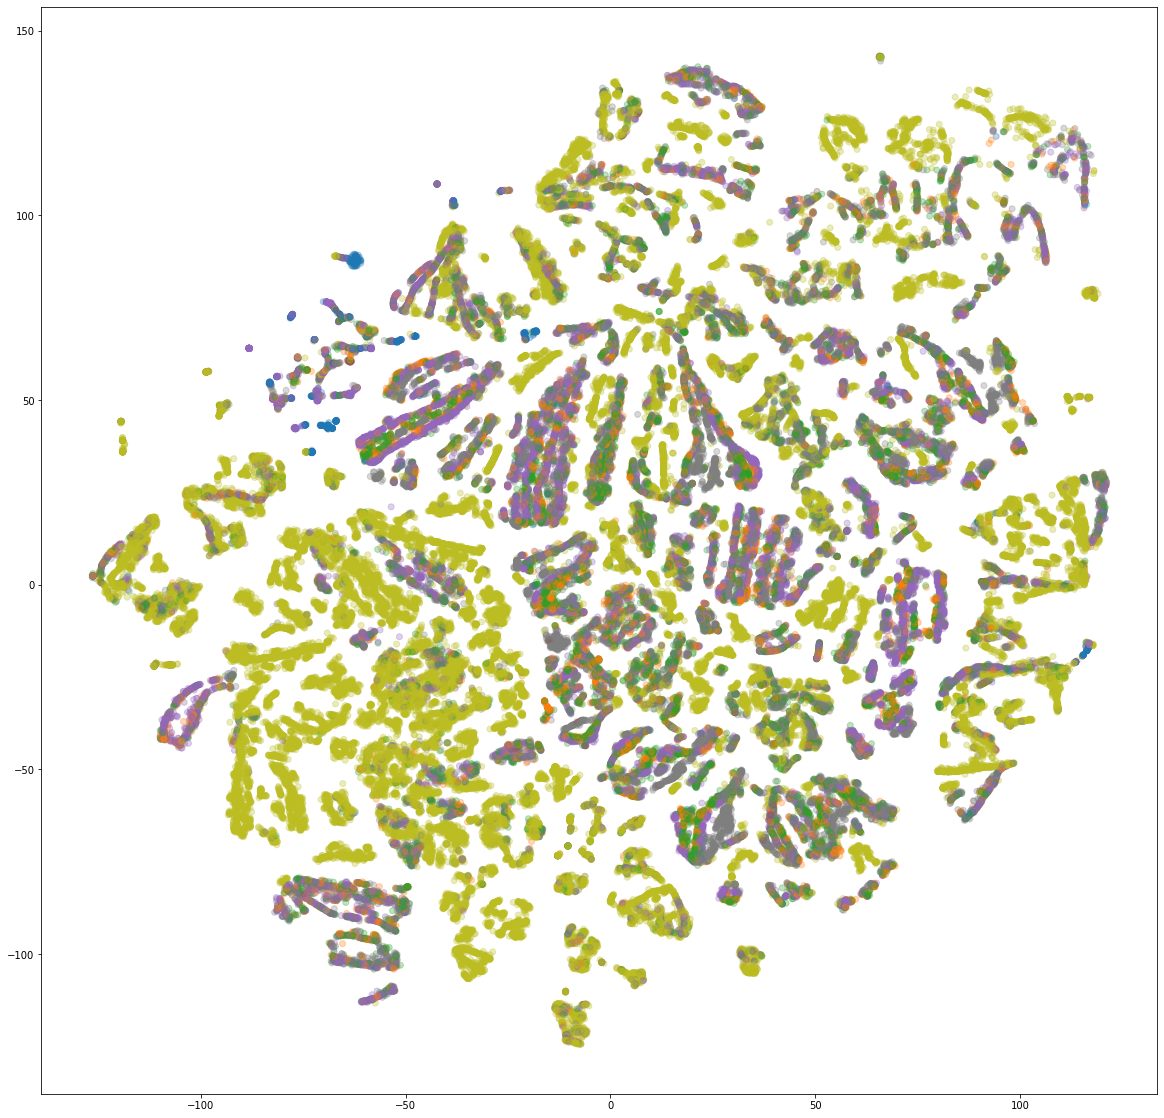

In [18]:
fig_tsne_c = plt.figure(figsize=(20,20))

plt.scatter(tsne_results_c['x'], tsne_results_c['y'],c=fars_pd[categorie_to_color].astype('int'),alpha=0.3, cmap=plt.cm.tab10_r)